In [ ]:
import os
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

Image counts: {'Swimming': 5878, 'Treading Water': 2734, 'Drowning': 1622}
Category with the maximum images: Swimming (5878 images)


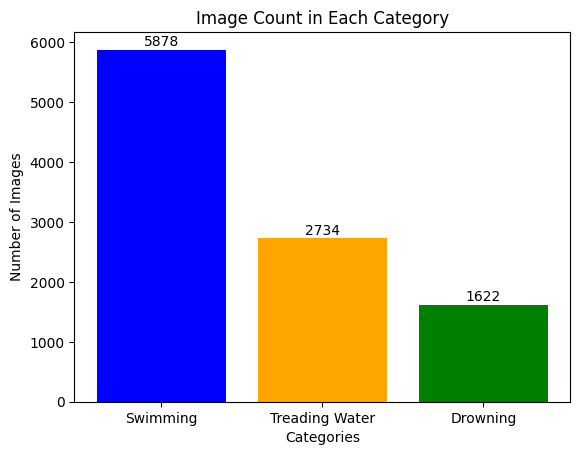

In [6]:
# Define folder paths and categories
folders = [r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\swimming', 
           r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\thread_water', 
           r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\drowning']
categories = ['Swimming', 'Treading Water', 'Drowning']

# Count the number of images in each folder
image_counts = []
for folder in folders:
    image_count = len([f for f in os.listdir(folder) if f.endswith('jpg')])
    image_counts.append(image_count)

# Print image counts
print(f"Image counts: {dict(zip(categories, image_counts))}")

# Find the category with the maximum number of images
max_image_count = max(image_counts)
max_category = categories[image_counts.index(max_image_count)]
print(f"Category with the maximum images: {max_category} ({max_image_count} images)")

# Plotting the bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, image_counts, color=['blue', 'orange', 'green'])

# Annotate each bar with the count
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 10,  # Positioning text above the bar
            str(yval), ha='center', va='bottom', fontsize=10)  # Display the number

# Labeling the axes and the chart
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Image Count in Each Category')
plt.show()

In [ ]:
class RandomAffineWithInpainting:
    def __init__(self, degrees=0, translate=(0.2, 0.2), radius=3):
        self.affine = transforms.RandomAffine(degrees=degrees, translate=translate)
        self.inpaint_radius = radius

    def __call__(self, img):
        # Step 1: Apply affine transform (returns PIL image)
        img = self.affine(img)

        # Step 2: Convert to NumPy array
        img_np = np.array(img)

        # Step 3: Create mask where pixels are black
        gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
        mask = cv2.inRange(gray, 0, 1)

        # Step 4: Inpaint using OpenCV
        inpainted_np = cv2.inpaint(img_np, mask, self.inpaint_radius, cv2.INPAINT_TELEA)

        # Step 5: Convert back to PIL
        img_inpainted = Image.fromarray(inpainted_np)

        return img_inpainted

# Define the augmentation transformations
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    RandomAffineWithInpainting(degrees=0, translate=(0.2, 0.2)),
    transforms.ToTensor()
])

Augmenting 3144 images in Treading Water...
Augmenting 4256 images in Drowning...
Total number of augmented images in Treading Water: 3144
Total number of augmented images in Drowning: 4256


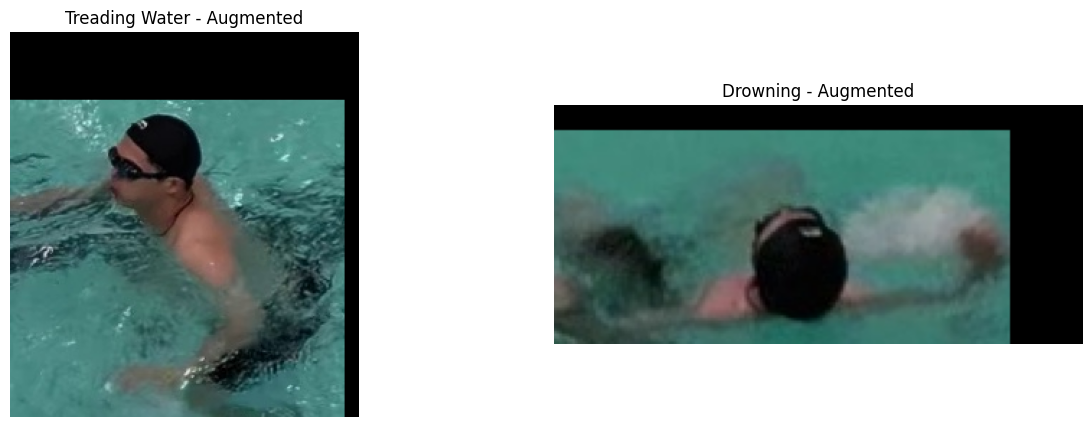

In [20]:
folders_to_augment = [ r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\thread_water', 
           r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\drowning']


# Dictionaries to hold augmented images for each category
augmented_images = {
    'Treading Water': [],
    'Drowning': []
}

# Apply augmentation to images in the selected folders until reaching the max count
for i, folder_path in enumerate(folders_to_augment):
    category = categories[folders.index(folder_path)]  # Get the correct category from the original list
    current_image_count = len([f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])
    required_images = max_image_count - current_image_count  # How many more images are needed
    print(f"Augmenting {required_images} images in {category}...")

    # Keep augmenting the images until the required number is reached
    while len(augmented_images[category]) < required_images:
        for filename in os.listdir(folder_path):
            if filename.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path)  # Open the image

                # Apply the transformations
                augmented_img = augmentation_transforms(img)  # Apply transformations

                # Append the augmented image to the respective category list
                augmented_images[category].append(augmented_img)

                # Stop when we reach the required number of augmented images
                if len(augmented_images[category]) >= required_images:
                    break

# Display the number of augmented images for each category
for category, images in augmented_images.items():
    print(f"Total number of augmented images in {category}: {len(images)}")

# Optionally, display a few augmented images for each category
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, (category, images) in zip(axes, augmented_images.items()):
    ax.imshow(images[0].permute(1, 2, 0))  # Display the first augmented image in the category
    ax.set_title(f"{category} - Augmented")
    ax.axis('off')
plt.show()